In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import sklearn.preprocessing as prep
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

from LstmVAE import LSTM_Var_Autoencoder
from LstmVAE import preprocess



mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
print (mnist.train.images.shape, mnist.test.images.shape)

def standard_scale(X_train, X_test):
    preprocessor = prep.StandardScaler().fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    return X_train, X_test

X_train, X_test = standard_scale(mnist.train.images, mnist.test.images)

# Reshape into shape [None, num_steps, num_features]
X_train = X_train.reshape([-1, 28, 28])[0:1000]
X_test = X_test.reshape([-1, 28, 28])[0:100]
print (X_train.shape, X_test.shape)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784) (10000, 784)
(1000, 28, 28) (100, 28, 28)


In [3]:
vae = LSTM_Var_Autoencoder(intermediate_dim = 200, z_dim = 3, n_dim=28, stateful = True) #default stateful = False

vae.fit(X_train, learning_rate=0.001, batch_size = 100, num_epochs = 200, opt = tf.train.AdamOptimizer, REG_LAMBDA = 0.01, grad_clip_norm=10, optimizer_params=None, verbose = True)



Training...


Epoch   1    Loss 0.82581
Epoch   11   Loss 0.79601
Epoch   21   Loss 0.79425
Epoch   31   Loss 0.79388
Epoch   41   Loss 0.79353
Epoch   51   Loss 0.79337
Epoch   61   Loss 0.79341
Epoch   71   Loss 0.79331
Epoch   81   Loss 0.79318
Epoch   91   Loss 0.79304
Epoch  101   Loss 0.79301
Epoch  111   Loss 0.79305
Epoch  121   Loss 0.79309
Epoch  131   Loss 0.79311
Epoch  141   Loss 0.79300
Epoch  151   Loss 0.79304
Epoch  161   Loss 0.79296
Epoch  171   Loss 0.79302
Epoch  181   Loss 0.79295
Epoch  191   Loss 0.79302


Training time 7.87 minutes


In [8]:
x_reconstructed, recons_error = vae.reconstruct(X_test, get_error = True) #returns squared error

x_reduced = vae.reduce(X_test) #latent space representation

Text(0.5, 0, 'latent 3')

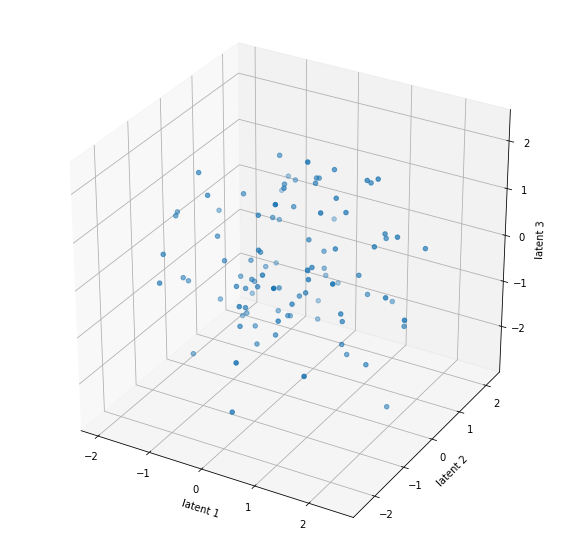

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_reduced[:, 0], x_reduced[:, 1], x_reduced[:, 2])
ax.set_xlabel('latent 1')
ax.set_ylabel('latent 2')
ax.set_zlabel('latent 3')

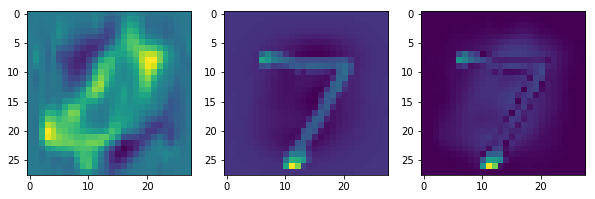

In [10]:
plt.figure(figsize=(10, 30)); 
plt.subplot(1,3,1); plt.imshow(x_reconstructed[0])
plt.subplot(1,3,2); plt.imshow(X_test[0])
plt.subplot(1,3,3); plt.imshow(np.abs(X_test[0] - x_reconstructed[0]))